In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the data

application_data = pd.read_csv('application_data.csv')
previous_application = pd.read_csv('previous_application.csv')

In [4]:
# Display head 

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Display shape

print('application data =',application_data.shape)
print('previous application =', previous_application.shape)

application data = (307511, 122)
previous application = (1670214, 37)


In [7]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
# Calculating the null percentage

null_percentage = application_data.isnull().sum() * 100 / len(application_data)
null_percentage

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [9]:
#Creating dataframe for null percentage 

missing_value_df = pd.DataFrame({'column_name': application_data.columns,
                                 'percent_null': null_percentage})
missing_value_df

,column_name,percent_null
SK_ID_CURR,SK_ID_CURR,0.000000
TARGET,TARGET,0.000000
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,CODE_GENDER,0.000000
FLAG_OWN_CAR,FLAG_OWN_CAR,0.000000
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,13.501631


In [10]:
# number of columns having more than 50% null values

columns_morethan_50percent_null_values = list(missing_value_df[missing_value_df['percent_null'] > 50].index)
len(columns_morethan_50percent_null_values)

41

In [11]:
# droping 41 columns having more than 50% null values

application_data.drop(labels=columns_morethan_50percent_null_values, axis=1, inplace=True)
application_data.shape

(307511, 81)

In [12]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [13]:
# removing the unwanted columns as these columns does not represent any specific information about the user

unwanted=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
          'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
          'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
          'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
          'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
          'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE']

print("unwanted columns count =", len(unwanted))

application_data.drop(labels=unwanted, axis=1, inplace=True)
application_data.shape

unwanted columns count = 27


(307511, 54)

In [14]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [15]:
# Converting DAYS_BIRTH and DAYS_EMPLOYED to years

daysToyears = lambda x : abs(int(x/365))

application_data['DAYS_BIRTH'] = application_data['DAYS_BIRTH'].apply(daysToyears)

application_data['DAYS_EMPLOYED'] = application_data['DAYS_EMPLOYED'].apply(daysToyears)

In [16]:
application_data['DAYS_BIRTH'].head(10)

0    25
1    45
2    52
3    52
4    54
5    46
6    37
7    51
8    55
9    39
Name: DAYS_BIRTH, dtype: int64

In [17]:
application_data['DAYS_EMPLOYED'].head(10)

0       1
1       3
2       0
3       8
4       8
5       4
6       8
7       1
8    1000
9       5
Name: DAYS_EMPLOYED, dtype: int64

In [18]:
application_data[application_data['DAYS_EMPLOYED'] >=100]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0.0,0.0,0.0,-2396.0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0.0,0.0,0.0,-795.0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,0.0,0.0,0.0,-491.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,2.0,11.0,0.0,-1667.0,0.0,0.0,0.0,1.0,0.0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,1.0,1.0,1.0,-1775.0,0.0,0.0,0.0,0.0,0.0,5.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0.0,0.0,0.0,-846.0,0.0,0.0,0.0,0.0,1.0,8.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [33]:
application_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [34]:
# so there are four rows having XNA means 'Not Available'
# Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

application_data.loc[application_data['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = 'F'
application_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### Outlier Analysis

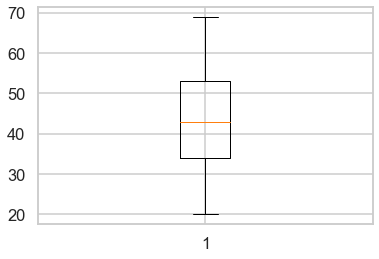

In [125]:
# checking for age

plt.boxplot(application_data.DAYS_BIRTH)
plt.show()

Don't see any outliers and most of the applicants are in age group of 35 to 55

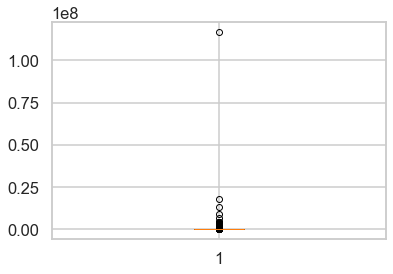

In [126]:
# Checking total income 

plt.boxplot(application_data.AMT_INCOME_TOTAL)
plt.show()

Some outliers can be seen 

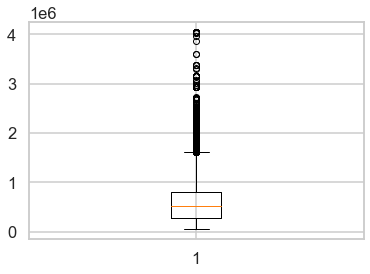

In [127]:
# Checking credit amount 

plt.boxplot(application_data.AMT_CREDIT)
plt.show()

Huge number of ouliers can be seen, means most of the credit lies in outliers

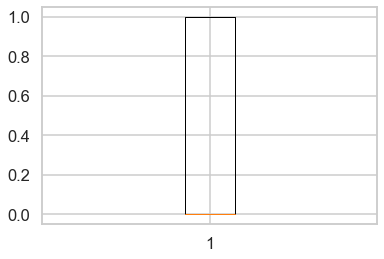

In [131]:
# Checking flag phone 

plt.boxplot(application_data.FLAG_PHONE)
plt.show()

All applicants phone was reachable 

#### Derived Metrics

##### Creating bins for 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [24]:
# AMT_INCOME_TOTAL

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [25]:
# AMT_CREDIT

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=slots)

#### For column organization type updating Business Entity Types as 'Business Entity', Trade types as 'Trade', Transport types as 'Transport' and Industry types as 'Industry' for easy analysis

In [60]:
def updateOrgType(org):
    if 'Business' in org:
        return 'Business Entity'
    elif 'Trade' in org:
        return 'Trade'
    elif 'Transport' in org:
        return 'Transport'
    elif 'Industry' in org:
        return 'Industry'
    else:
        return org

In [62]:
# adding new column as 'ORGANIZATION_CATEGORY'
application_data['ORGANIZATION_CATEGORY'] = application_data['ORGANIZATION_TYPE'].apply(updateOrgType)

In [65]:
application_data.ORGANIZATION_CATEGORY.value_counts()

Business Entity        84529
XNA                    55374
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14311
Medicine               11193
Government             10404
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion      

#### Before start of the analysis let's divide the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

In [66]:
target0 = application_data.loc[application_data["TARGET"]==0]
target1 = application_data.loc[application_data["TARGET"]==1]

#### Univariate analysis for categories

#### Categorical Univariate Analysis for target=0(client with no payment difficulties)

In [67]:
# function to plot univariate graphs

def plotUnivariateGraphs(df,col,title,hue = None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='viridis') 
        
    plt.show()

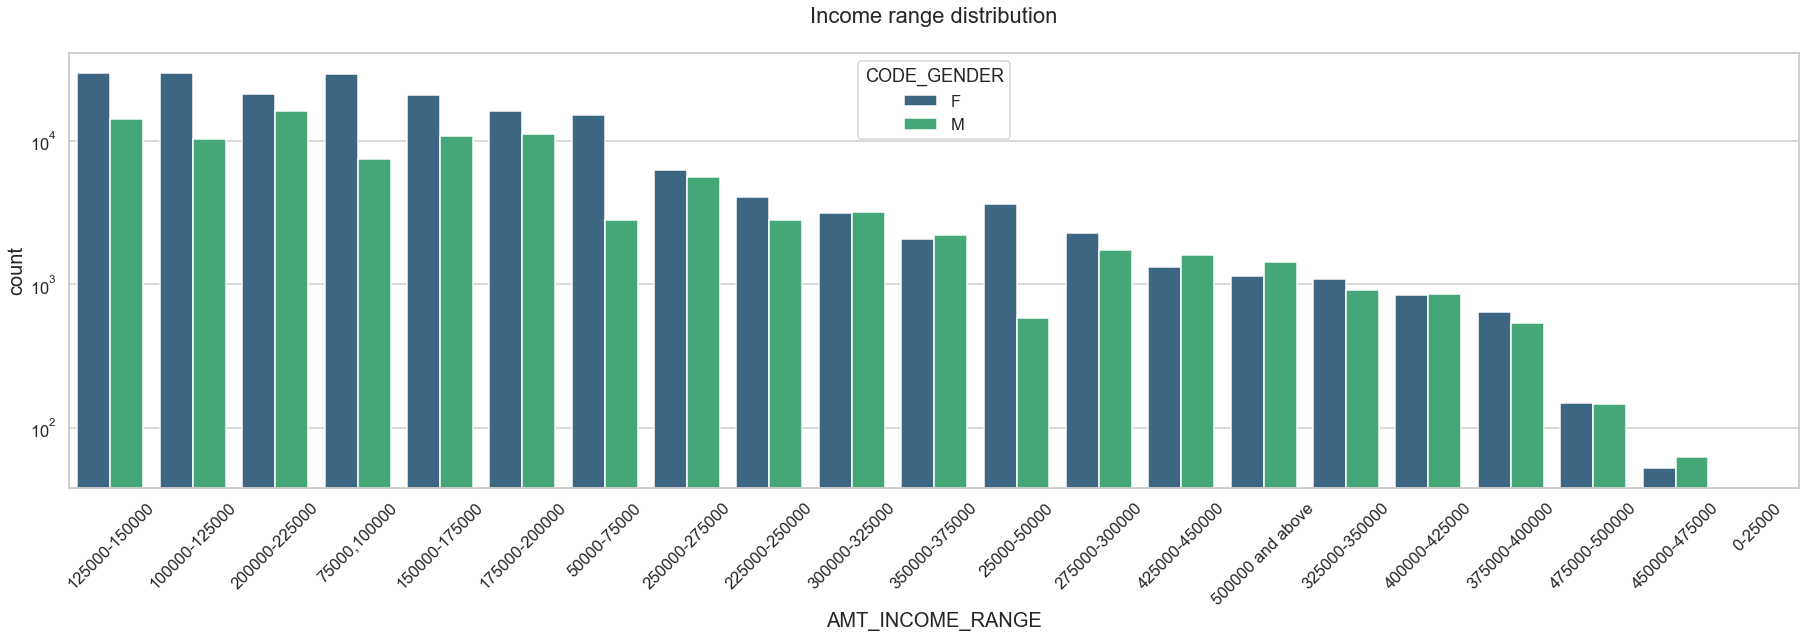

In [68]:
# plotting for income range for code gender

plotUnivariateGraphs(target0,col='AMT_INCOME_RANGE',title='Income range distribution',hue='CODE_GENDER')

#### Points can be conculded from above -
##### 1. As compared to Male, Female count is more
##### 2. Most of the credits are in the income range of 50000 to 225000
##### 3. For income range 450000 to 475000 count is very less

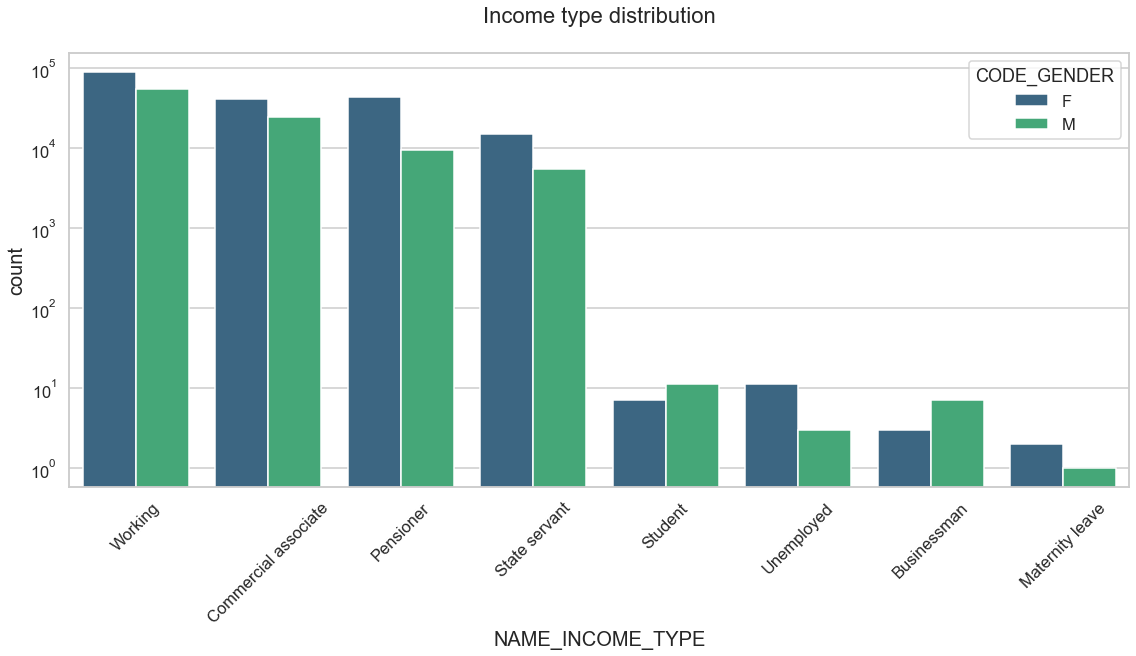

In [69]:
# plotting for Income type

plotUnivariateGraphs(target0,col='NAME_INCOME_TYPE',title='Income type distribution',hue='CODE_GENDER')

#### Points can be concluded from above-

##### 1. For income type working, commercial associate, Pensioner and State Servant the number of credits are higher than others.
##### 2. Less number of credits for income type Student ,Unemployed, Businessman and Maternity leave.
##### 3. Mostly number of female credits is more than men in income type.

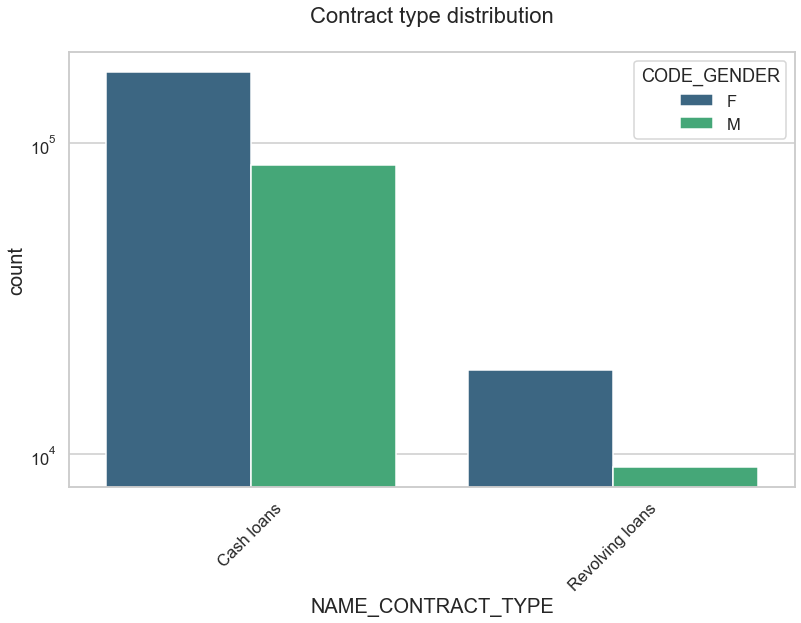

In [81]:
# plotting for Contract type

plotUnivariateGraphs(target0,col='NAME_CONTRACT_TYPE',title='Contract type distribution',hue='CODE_GENDER')

#### Points can be concluded from above-

##### 1. For contract type ‘cash loans’ number of credits is much higher than ‘Revolving loans’ contract type.
##### 2. Number of female credits is more than men.

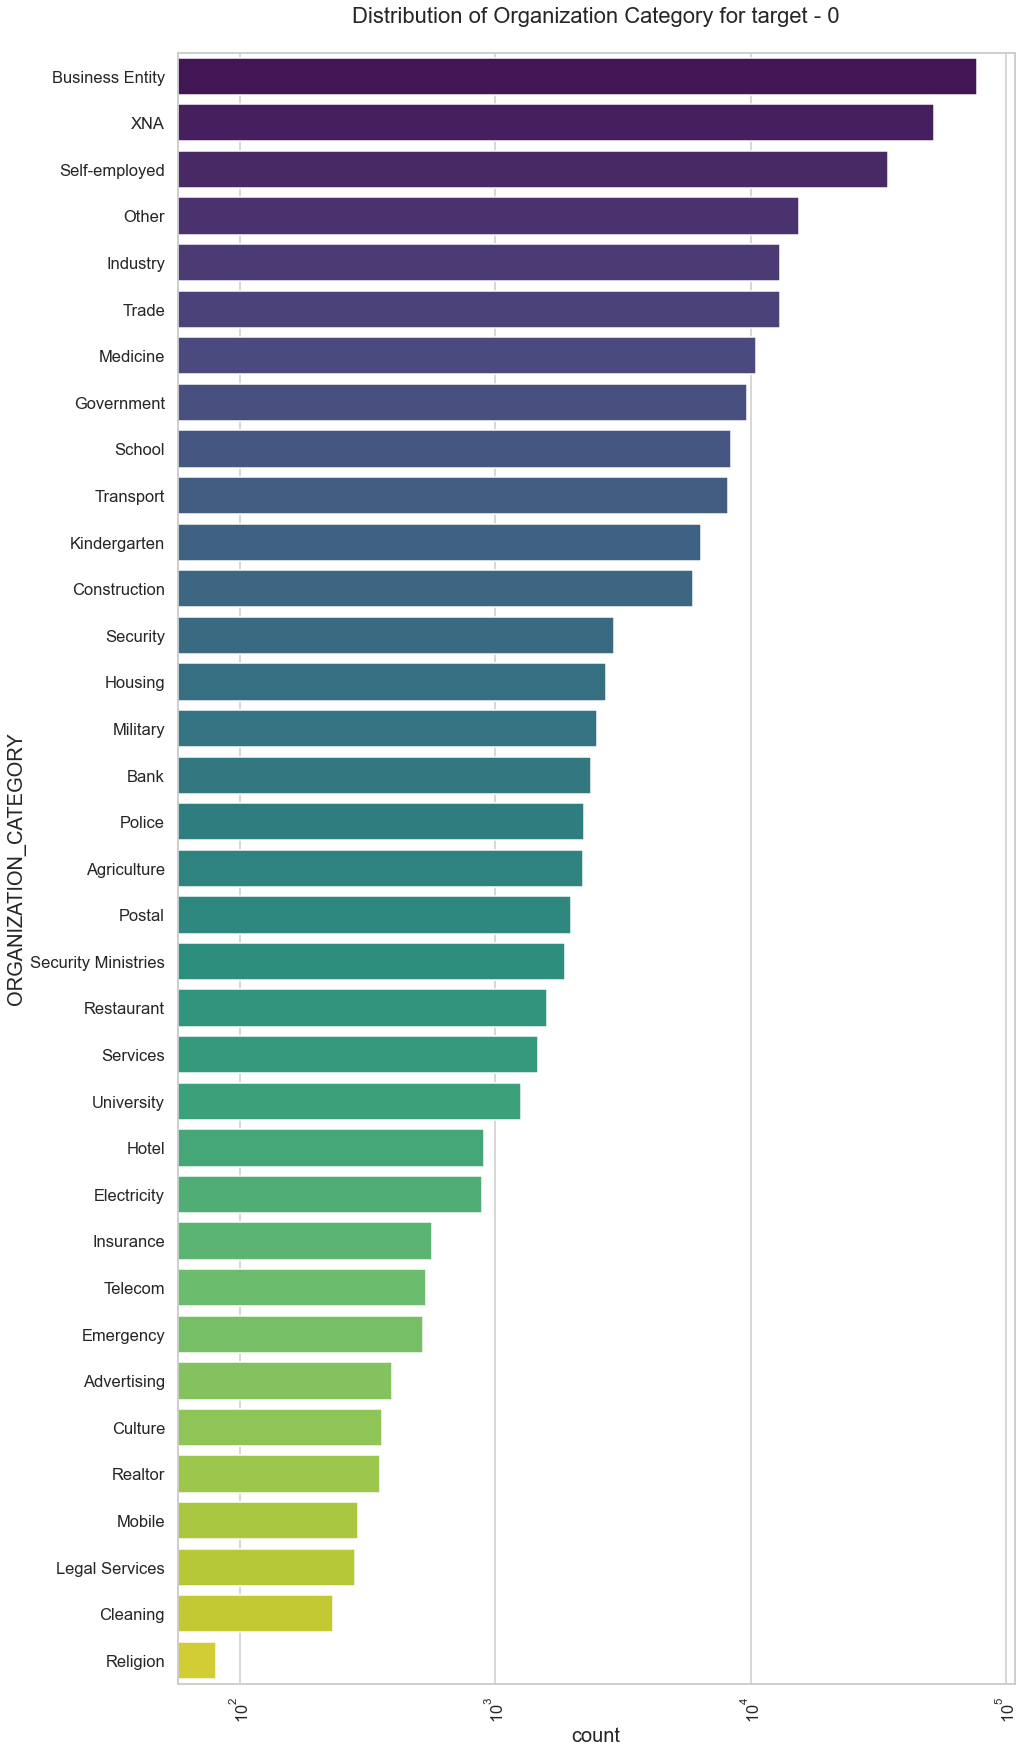

In [86]:
# plotting bar graph for Organization Category

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization Category for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0,y='ORGANIZATION_CATEGORY',order=target0['ORGANIZATION_CATEGORY'].value_counts().index,palette='viridis')

plt.show()

#### Points can be concluded from above-

##### 1. Most the applicants are from Business, Self employed, Other, Industry and Trade category.
##### 2. Less number of applicants are from Religion, Cleaning, Leagal Services.

#### Categorical Univariate Analysis for target=1(client with payment difficulties)

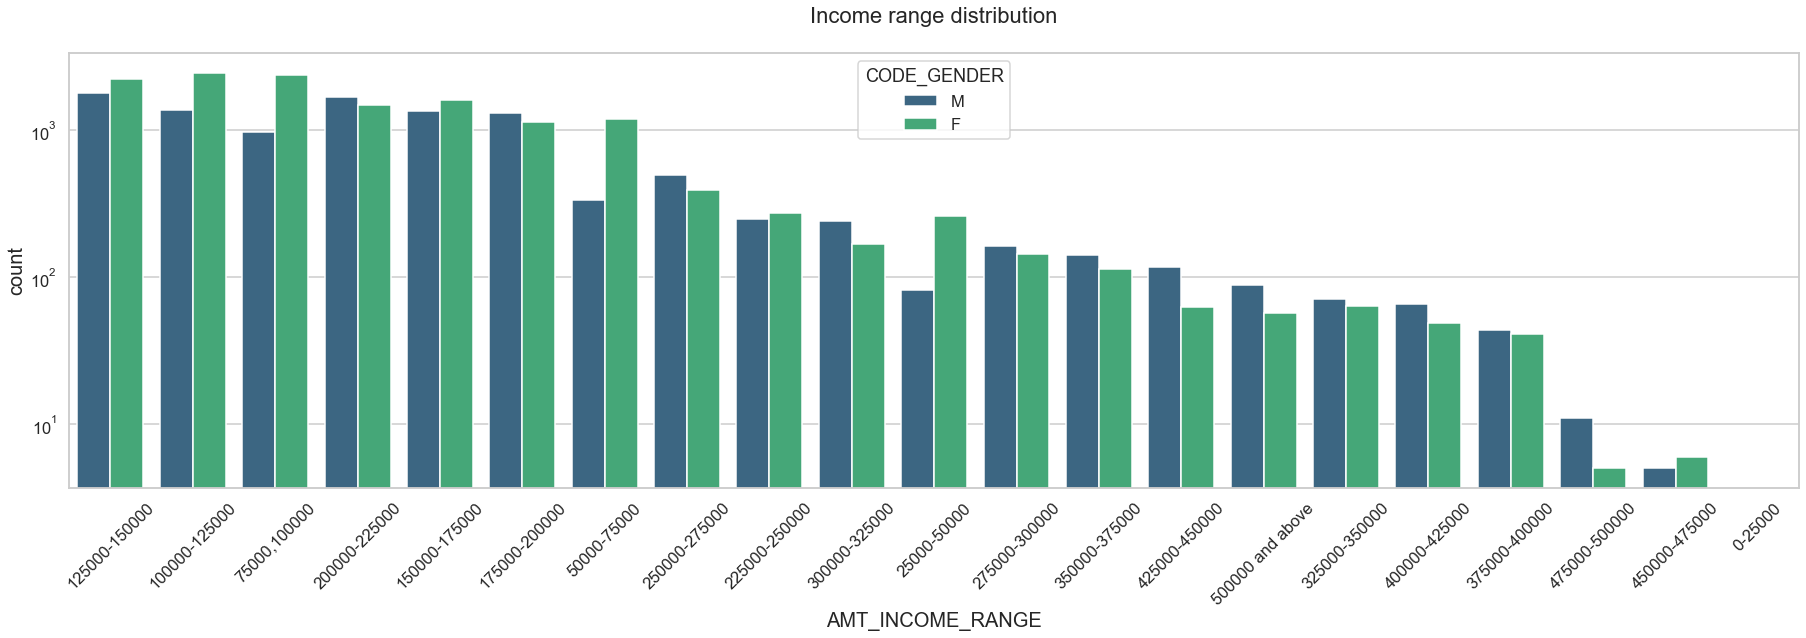

In [77]:
# plotting for income range

plotUnivariateGraphs(target1,col='AMT_INCOME_RANGE',title='Income range distribution',hue='CODE_GENDER')

#### Points can be conculded from above -
##### 1. As compared to Male, Female count is more
##### 2. Most of the credits are in the income range of 50000 to 225000
##### 3. For income range 450000 to 500000 count is very less

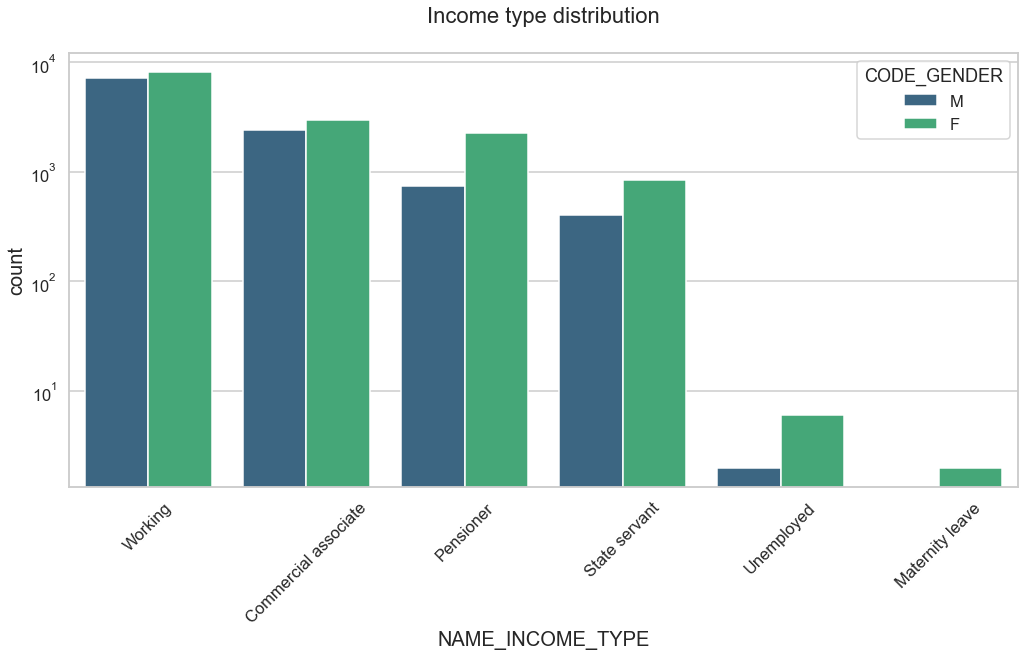

In [79]:
# plotting for Income type

plotUnivariateGraphs(target1,col='NAME_INCOME_TYPE',title='Income type distribution',hue='CODE_GENDER')

#### Points can be concluded from above-

##### 1. For income type working, commercial associate, Pensioner and State Servant the number of credits are higher than others.
##### 2. Less number of credits for income type Unemployed and Maternity leave.
##### 3. Most important thing to notice here that Student & Businessman are not defaulters and very less difficulty in payment.

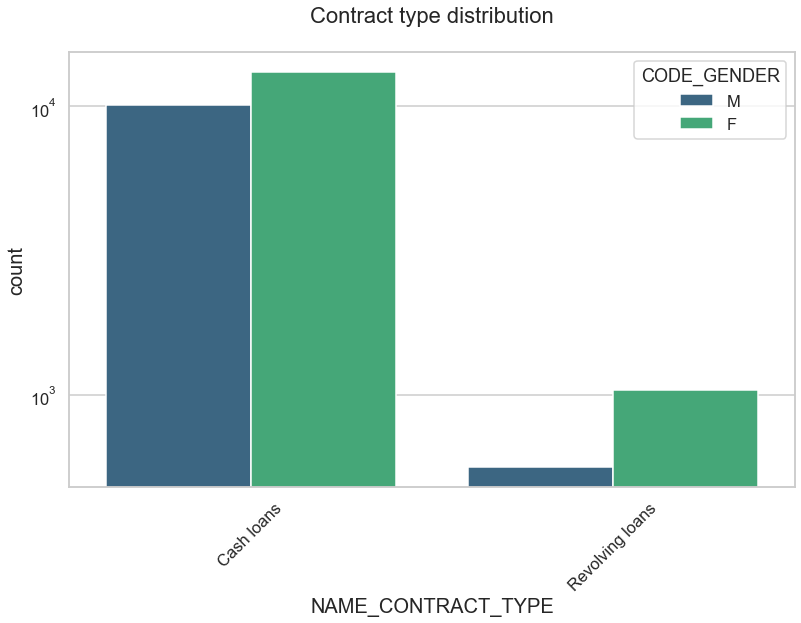

In [85]:
# plotting for Contract type

plotUnivariateGraphs(target1, col='NAME_CONTRACT_TYPE',title='Contract type distribution',hue='CODE_GENDER')

#### Points can be concluded from above-

##### 1. For contract type ‘cash loans’ number of credits is much higher than ‘Revolving loans’ contract type.
##### 2. Number of female credits is more than men.

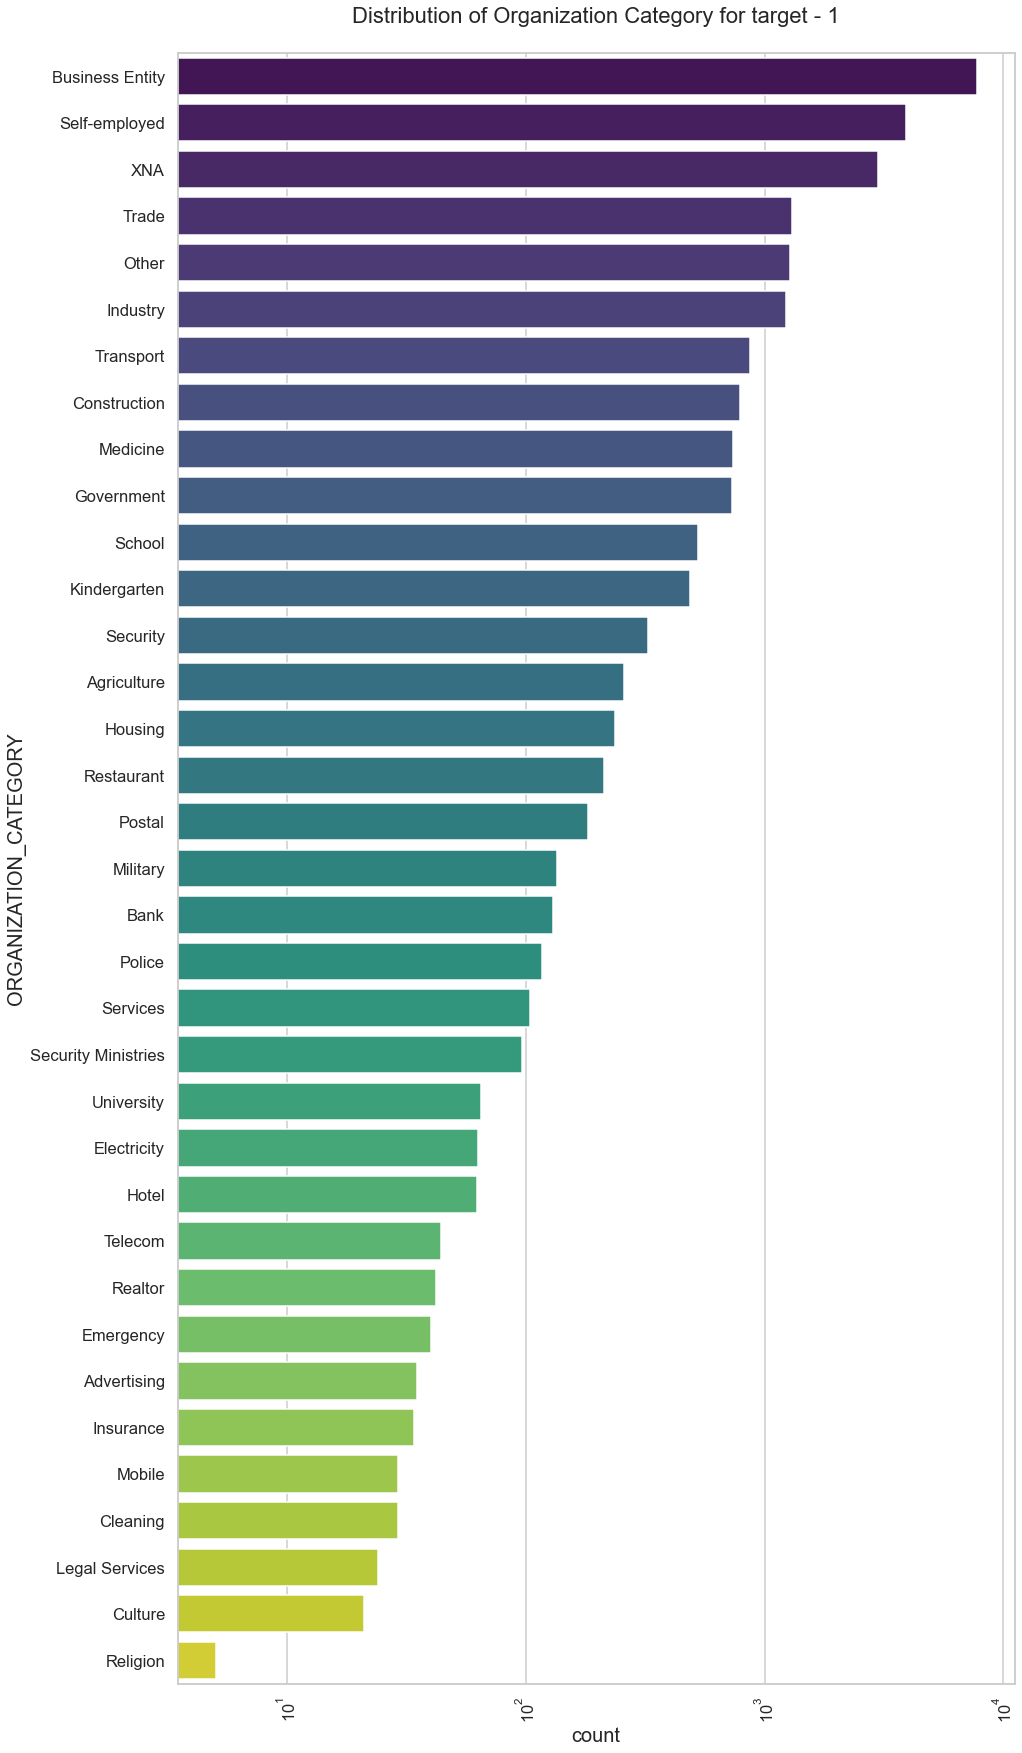

In [87]:
# Plotting for Organization Category

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization Category for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target1,y='ORGANIZATION_CATEGORY',order=target1['ORGANIZATION_CATEGORY'].value_counts().index,palette='viridis')

plt.show()

#### Points can be concluded from above-

##### 1. Most the applicants are from Business, Self employed, Other, Industry and Trade category.
##### 2. Less number of applicants are from Religion, Culture, Leagal Services.

#### Correlation Matrix for numeric columns

In [113]:
# getting all the columns with numeric data type

numType = application_data.select_dtypes(include=np.number).columns.tolist()

In [114]:
numType

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [115]:
# removing unwanted varibales 

unwantedColumns = ['SK_ID_CURR',
 'TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

for i in unwantedColumns:
    numType.remove(i)

In [116]:
numType

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_PHONE',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

In [117]:
# Now will use spearman correlation method to understand the correlation between all the numeric variables for target 0 and 1  

target0_corrData=target0.loc[0:,numType]
target1_corrData=target1.loc[0:,numType]

target0_corr=target0_corrData.corr(method='spearman')
target1_corr=target1_corrData.corr(method='spearman')

In [119]:
target0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.038308,0.002315,0.024767,-0.001293,-0.025551,-0.375611,-0.205923,0.180517,-0.019986,-0.035017,0.001725,-0.010738,0.015455,0.021523,0.027788,0.076212,0.071585
AMT_INCOME_TOTAL,0.038308,1.000000,0.416017,0.485699,0.419929,0.097772,-0.093418,-0.096986,0.076387,0.035931,-0.012279,0.102384,0.078372,0.161441,0.148976,0.020368,0.040087,0.040321
AMT_CREDIT,0.002315,0.416017,1.000000,0.831900,0.985510,0.053570,0.057140,0.017473,0.009416,-0.001982,0.017486,0.051370,0.019093,0.045430,0.047740,-0.026649,-0.012662,0.006972
AMT_ANNUITY,0.024767,0.485699,0.831900,1.000000,0.830368,0.058591,-0.011725,-0.031148,0.037717,0.016569,0.006308,0.054189,0.035823,0.075783,0.073054,-0.004963,0.009717,0.019451
AMT_GOODS_PRICE,-0.001293,0.419929,0.985510,0.830368,1.000000,0.062650,0.058242,0.022145,0.009528,-0.004018,0.031763,0.058906,0.020410,0.046406,0.048089,-0.028152,-0.015453,0.004685
REGION_POPULATION_RELATIVE,-0.025551,0.097772,0.053570,0.058591,0.062650,1.000000,0.030825,-0.003184,-0.036684,-0.010463,0.062021,0.128237,-0.019922,0.029206,0.051195,-0.045545,-0.029350,-0.005476
DAYS_BIRTH,-0.375611,-0.093418,0.057140,-0.011725,0.058242,0.030825,1.000000,0.584051,-0.297997,-0.261471,0.041866,-0.098326,-0.066393,-0.096358,-0.069986,-0.180919,-0.239047,-0.156516
DAYS_EMPLOYED,-0.205923,-0.096986,0.017473,-0.031148,0.022145,-0.003184,0.584051,1.000000,-0.201681,-0.260115,0.046784,-0.084268,-0.070984,-0.137870,-0.112851,-0.145341,-0.263021,-0.199102
DAYS_REGISTRATION,0.180517,0.076387,0.009416,0.037717,0.009528,-0.036684,-0.297997,-0.201681,1.000000,0.094153,-0.078800,-0.008471,0.025938,0.032723,0.024163,0.055307,0.085865,0.062442
DAYS_ID_PUBLISH,-0.019986,0.035931,-0.001982,0.016569,-0.004018,-0.010463,-0.261471,-0.260115,0.094153,1.000000,-0.035688,0.039755,0.035392,0.049195,0.034776,0.077360,0.101050,0.062976


In [120]:
target1_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_PHONE,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.004749,0.000200,0.033679,-0.007572,-0.031628,-0.267796,-0.128196,0.133658,-0.027320,-0.030258,-0.022469,-0.025824,-0.019571,-0.009823,0.004127,0.047486,0.051352
AMT_INCOME_TOTAL,-0.004749,1.000000,0.359276,0.431617,0.362780,0.051463,0.007080,-0.037960,0.036671,-0.005929,-0.023726,0.088174,0.076449,0.156053,0.144970,0.008996,0.027994,0.030864
AMT_CREDIT,0.000200,0.359276,1.000000,0.811443,0.977224,0.039919,0.154908,0.083201,-0.017099,-0.053780,-0.003443,0.028537,0.014192,0.030331,0.032564,-0.028544,-0.029571,-0.011182
AMT_ANNUITY,0.033679,0.431617,0.811443,1.000000,0.804931,0.023297,0.030173,-0.003487,0.035900,-0.014472,-0.017713,0.032083,0.030930,0.063880,0.062370,-0.002849,0.007397,0.014922
AMT_GOODS_PRICE,-0.007572,0.362780,0.977224,0.804931,1.000000,0.054140,0.157548,0.093019,-0.019172,-0.059736,0.015831,0.040029,0.016977,0.033732,0.034991,-0.030182,-0.032558,-0.012560
REGION_POPULATION_RELATIVE,-0.031628,0.051463,0.039919,0.023297,0.054140,1.000000,0.046166,0.019985,-0.034315,-0.023668,0.048019,0.105989,-0.032472,-0.009009,0.010621,-0.057083,-0.044331,-0.016447
DAYS_BIRTH,-0.267796,0.007080,0.154908,0.030173,0.157548,0.046166,1.000000,0.468006,-0.232933,-0.250999,0.025575,-0.065815,-0.055885,-0.064813,-0.040127,-0.165424,-0.203315,-0.108822
DAYS_EMPLOYED,-0.128196,-0.037960,0.083201,-0.003487,0.093019,0.019985,0.468006,1.000000,-0.150828,-0.211092,0.048115,-0.042576,-0.074579,-0.117616,-0.089845,-0.144156,-0.250796,-0.169276
DAYS_REGISTRATION,0.133658,0.036671,-0.017099,0.035900,-0.019172,-0.034315,-0.232933,-0.150828,1.000000,0.095750,-0.068726,-0.032019,0.015237,0.014323,0.010359,0.033891,0.071324,0.052747
DAYS_ID_PUBLISH,-0.027320,-0.005929,-0.053780,-0.014472,-0.059736,-0.023668,-0.250999,-0.211092,0.095750,1.000000,-0.039915,0.026347,0.032654,0.032845,0.019967,0.068605,0.070867,0.031407


In [121]:
# plotting the above correlation with heat map to visulaize easily 

def plot_heatmap(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

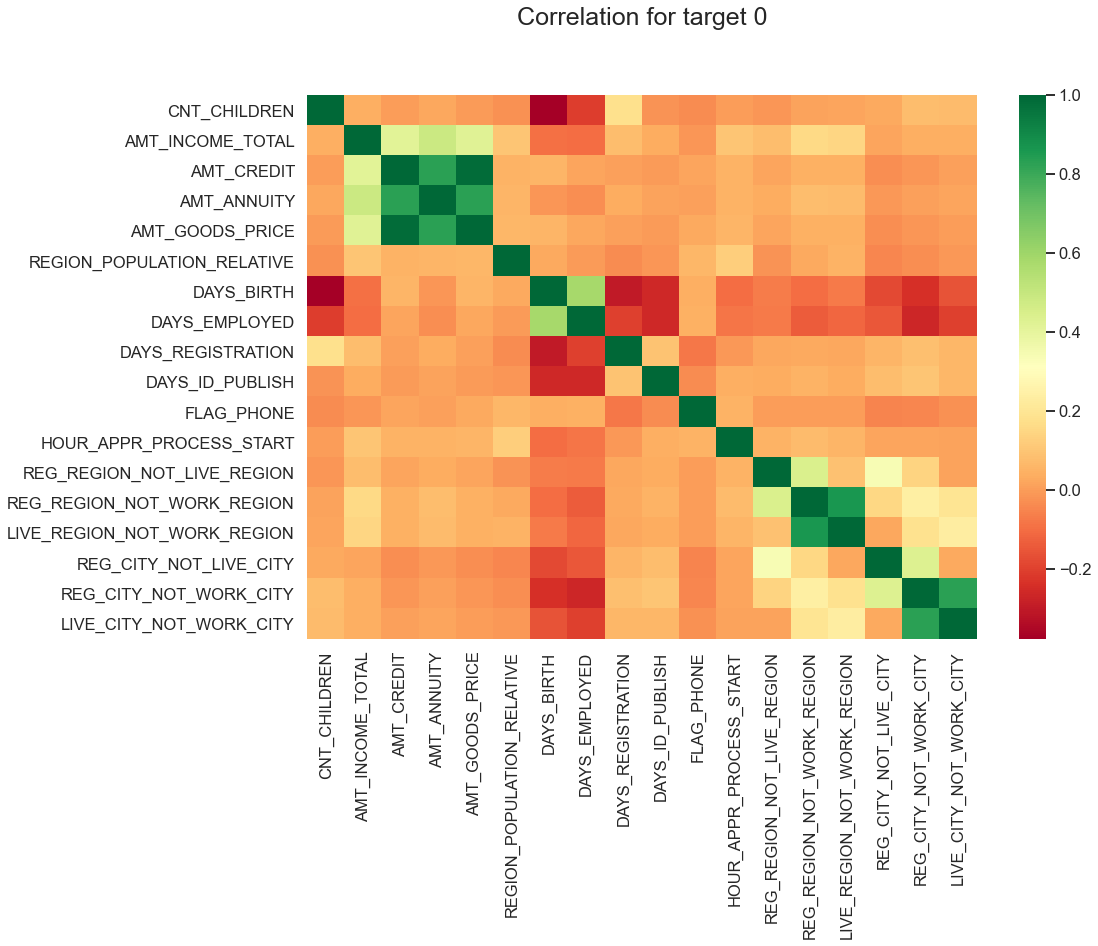

In [122]:
# For Target 0

plot_heatmap(data=target0_corr,title='Correlation for target 0')

#### Points can be concluded from above-

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. Credit amount is higher to densely populated area.
5. The income is also higher in densely populated area.

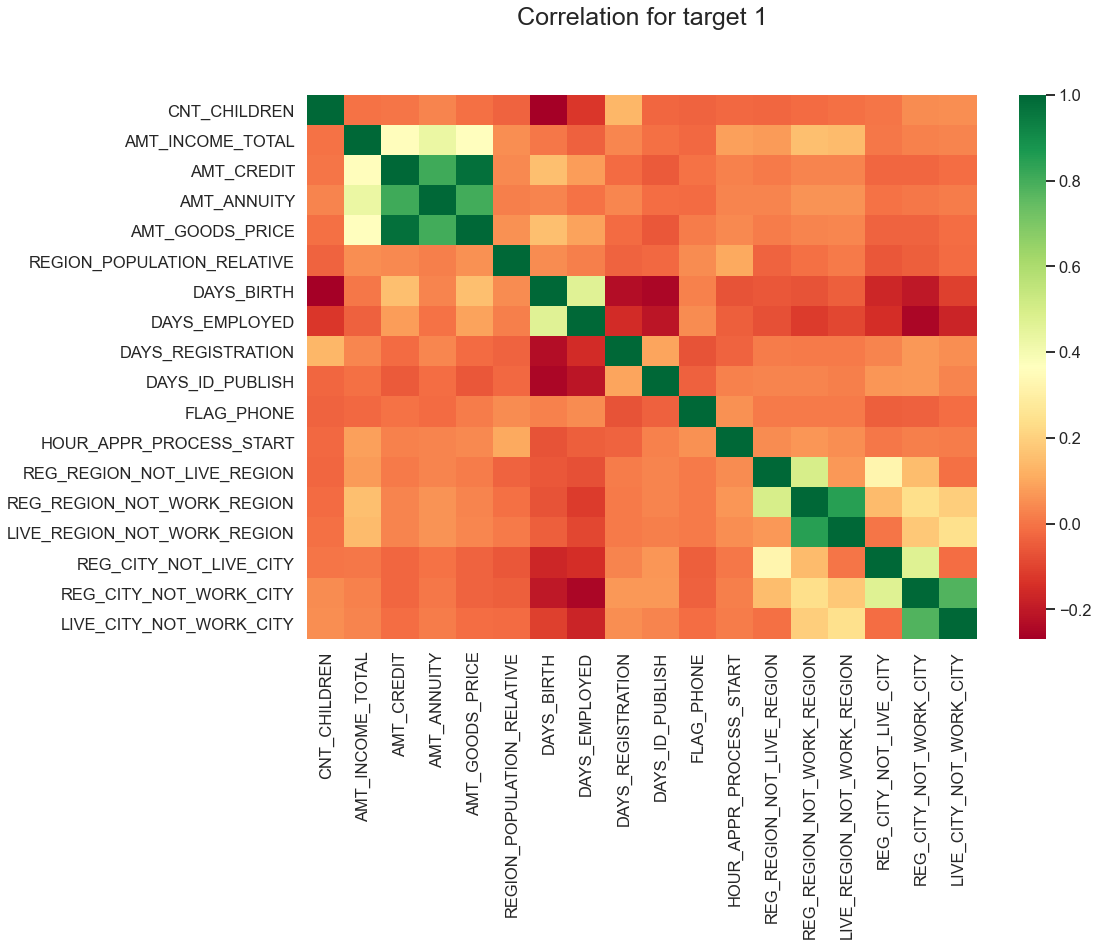

In [123]:
# For Target 1

plot_heatmap(data=target1_corr,title='Correlation for target 1')

#### Points can be concluded from above-

1. The client's permanent address does not match contact address are having less children and vice-versa
2. the client's permanent address does not match work address are having less children and vice-versa

#### Bivariate analysis for numerical variables

#### For Target 0

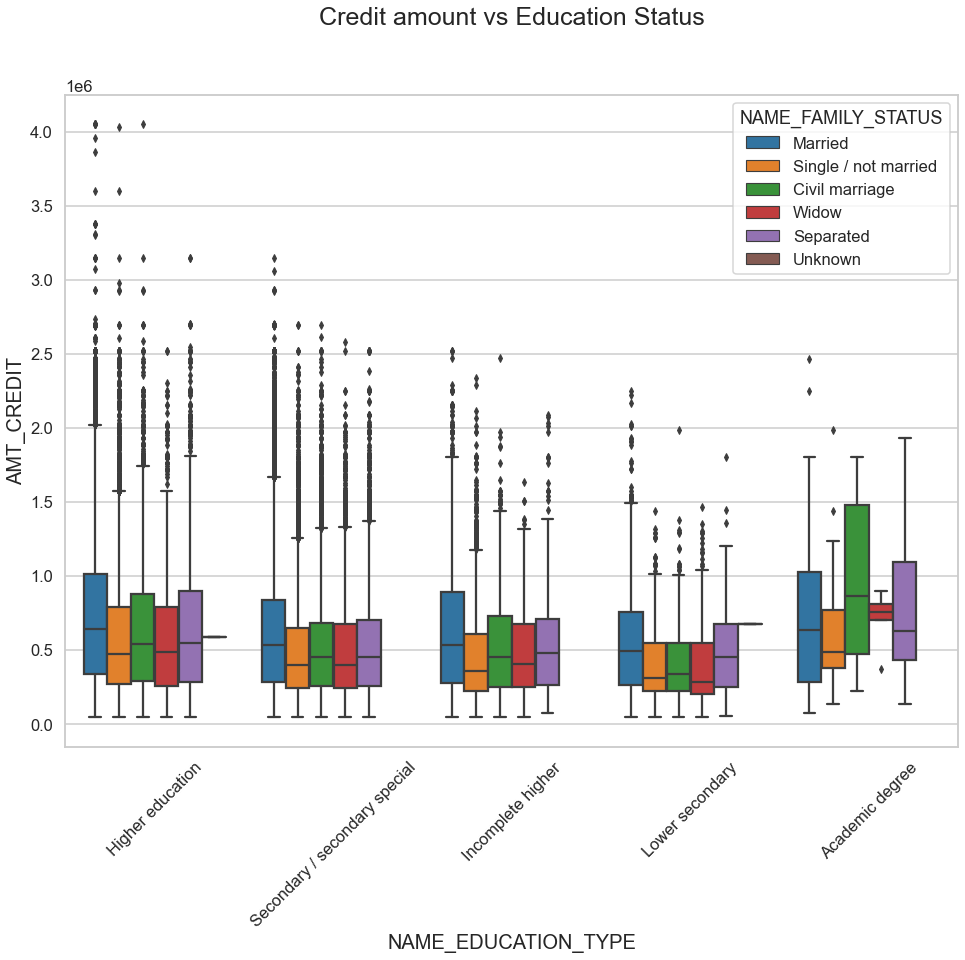

In [132]:
# Box plotting for Credit amount vs Education Status

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

#### Points can be concluded from above-

1. Family status of 'civil marriage', 'married' and 'separated' of Academic degree education are having higher number of credits than others. 
2. Higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. 
3. Lower secondary and Academic degree have very less outliers.
4. For mostly all education type, Marries family status have high number of credits.

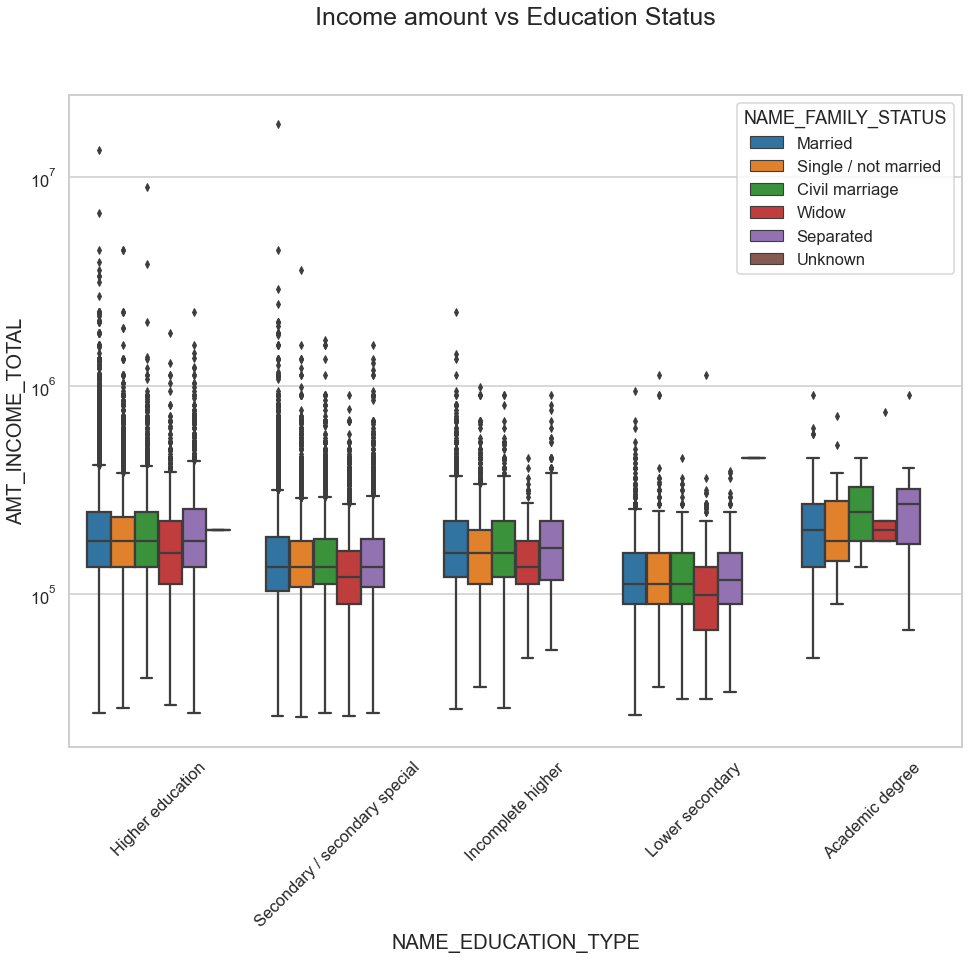

In [133]:
# Box plotting for Income amount vs Education Status

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### Points can be concluded from above-

1. For education type 'Higher education' the income amount is mostly equal with family status
2. Higher education have more outliers while Academic degree have very less.
3. Academic degree have high income except family status Widow

#### For Target 1

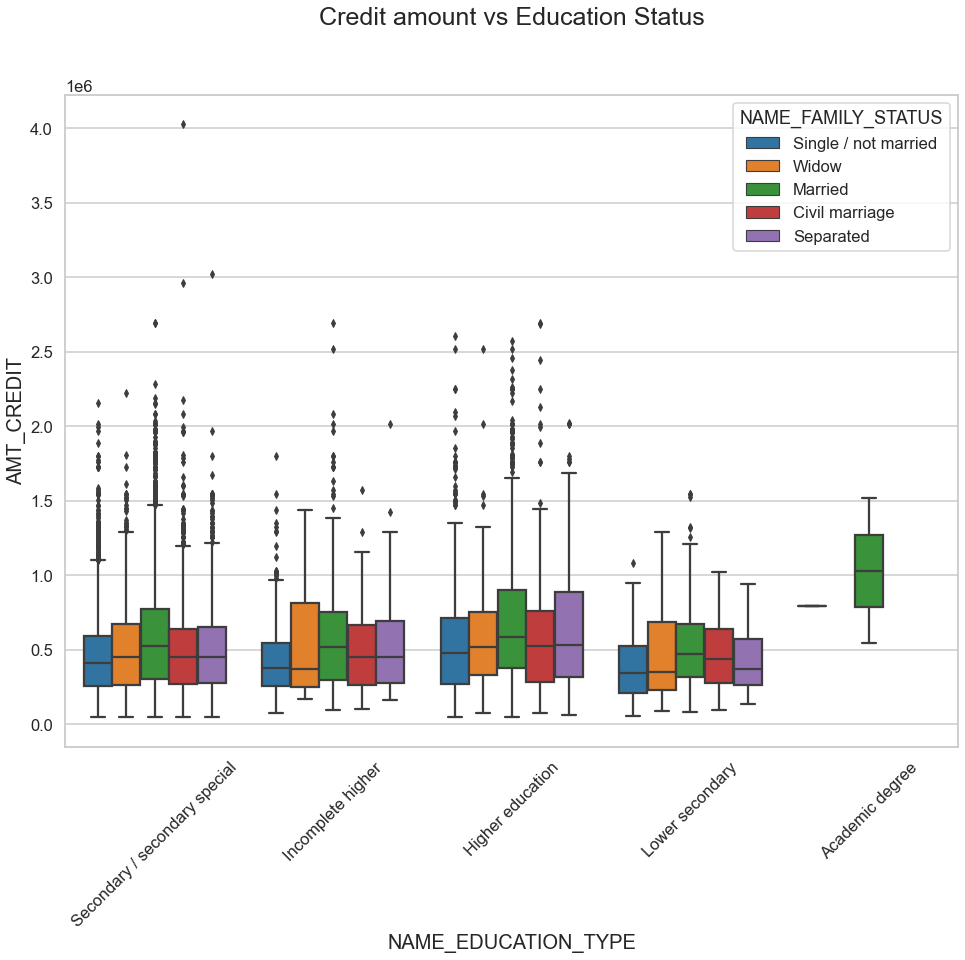

In [134]:
# Box plotting for Credit amount vs Education Status

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

#### Points can be concluded from above-

1. Highest credits is for family status Marries for education type Academic degree.
2. Most of the outliers are from Education type 'Higher education' and 'Secondary'. 

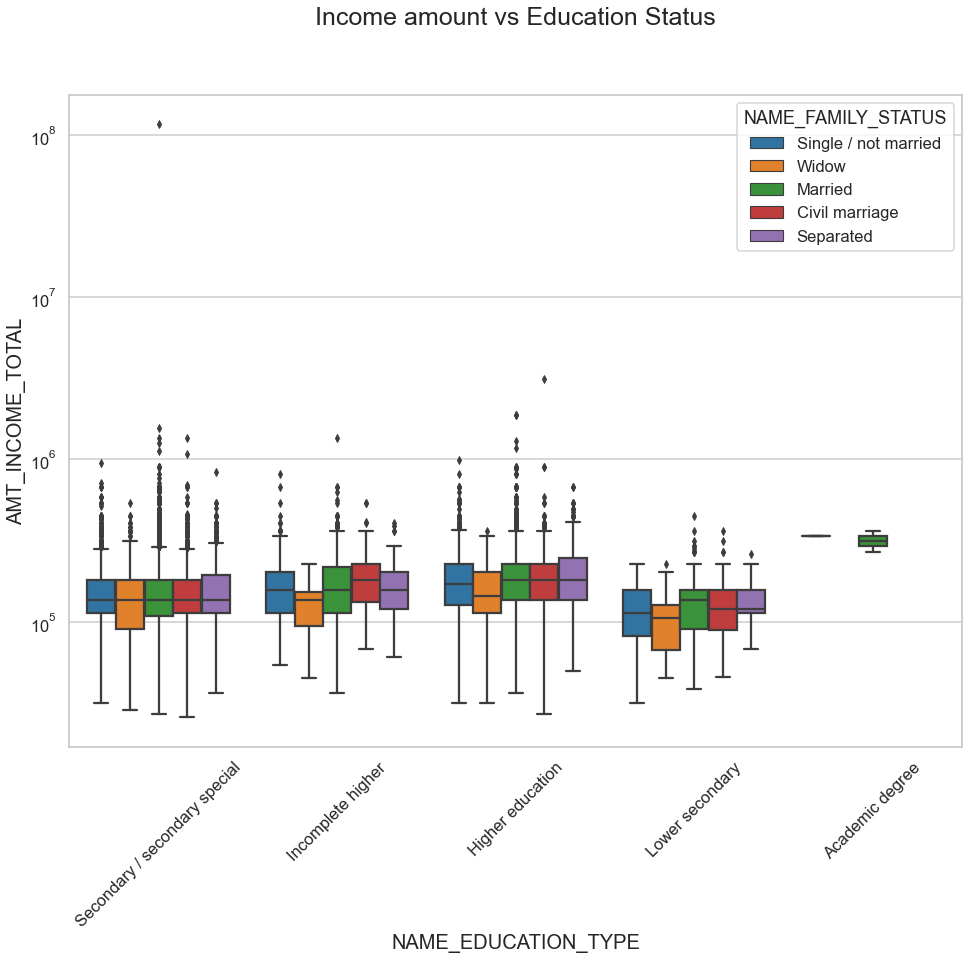

In [135]:
# Box plotting for Income amount vs Education Status

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

#### Points can be concluded from above-

1. Education type 'Higher education' the income amount is mostly equal with family status.
2. For education type Academic degree, majourly Married family status have high credit. Income is also high.

### Analysis of previous applications

In [136]:
# Calculating the null percentage

null_percentage_prev = previous_application.isnull().sum() * 100 / len(previous_application)
null_percentage_prev

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [137]:
#Creating dataframe for null percentage 

prev_missing_value_df = pd.DataFrame({'column_name': previous_application.columns,
                                 'percent_null': null_percentage_prev})
prev_missing_value_df

,column_name,percent_null
SK_ID_PREV,SK_ID_PREV,0.000000
SK_ID_CURR,SK_ID_CURR,0.000000
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,0.000000
AMT_ANNUITY,AMT_ANNUITY,22.286665
AMT_APPLICATION,AMT_APPLICATION,0.000000
AMT_CREDIT,AMT_CREDIT,0.000060
AMT_DOWN_PAYMENT,AMT_DOWN_PAYMENT,53.636480
AMT_GOODS_PRICE,AMT_GOODS_PRICE,23.081773
WEEKDAY_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,0.000000
HOUR_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,0.000000


In [138]:
# number of columns having more than 40% null values

columns_morethan_40percent_null_values = list(prev_missing_value_df[prev_missing_value_df['percent_null'] > 40].index)
len(columns_morethan_40percent_null_values)

11

In [139]:
# droping 11 columns having more than 40% null values

previous_application.drop(labels=columns_morethan_40percent_null_values, axis=1, inplace=True)
previous_application.shape

(1670214, 26)

In [140]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

#### Merging the Application dataset with previous appliaction dataset

In [141]:
# Now merging the Application with previous appliaction dataset

final = pd.merge(left=application_data,right=previous_application,how='inner',on='SK_ID_CURR',suffixes='_x')

In [142]:
final.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_', 'HOUR_APPR_PROCESS_START_',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'EMERGENCYSTATE_MODE', 'OBS_30_

In [144]:
final.shape

(1413701, 82)

In [147]:
# Renaming the column names after merging

final = final.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


In [148]:
# Removing unwanted columns for analysis

final.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

#### Univariate Analysis

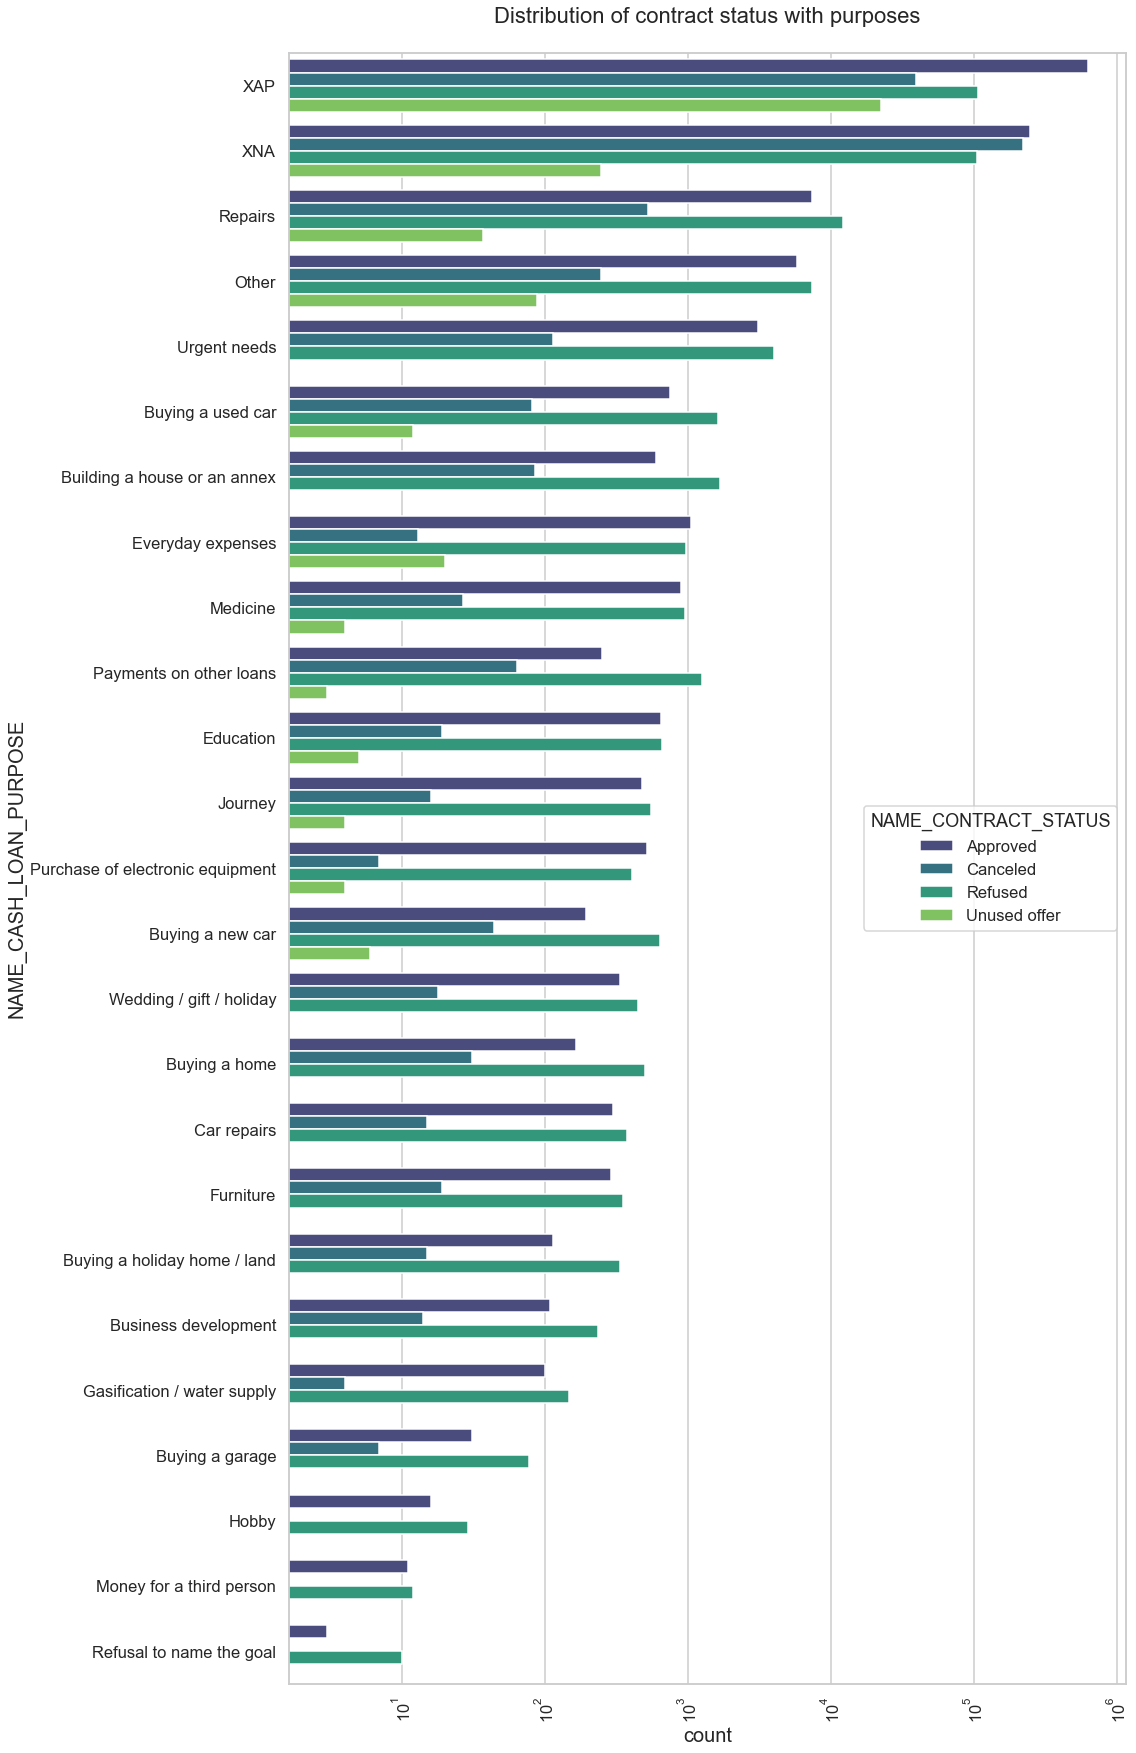

In [149]:
# Distribution of contract status 

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = final, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=final['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='viridis')

#### Points can be concluded from above-

1. Most rejection of loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. Payign other loans and buying a new car is having significant higher rejection than approves.

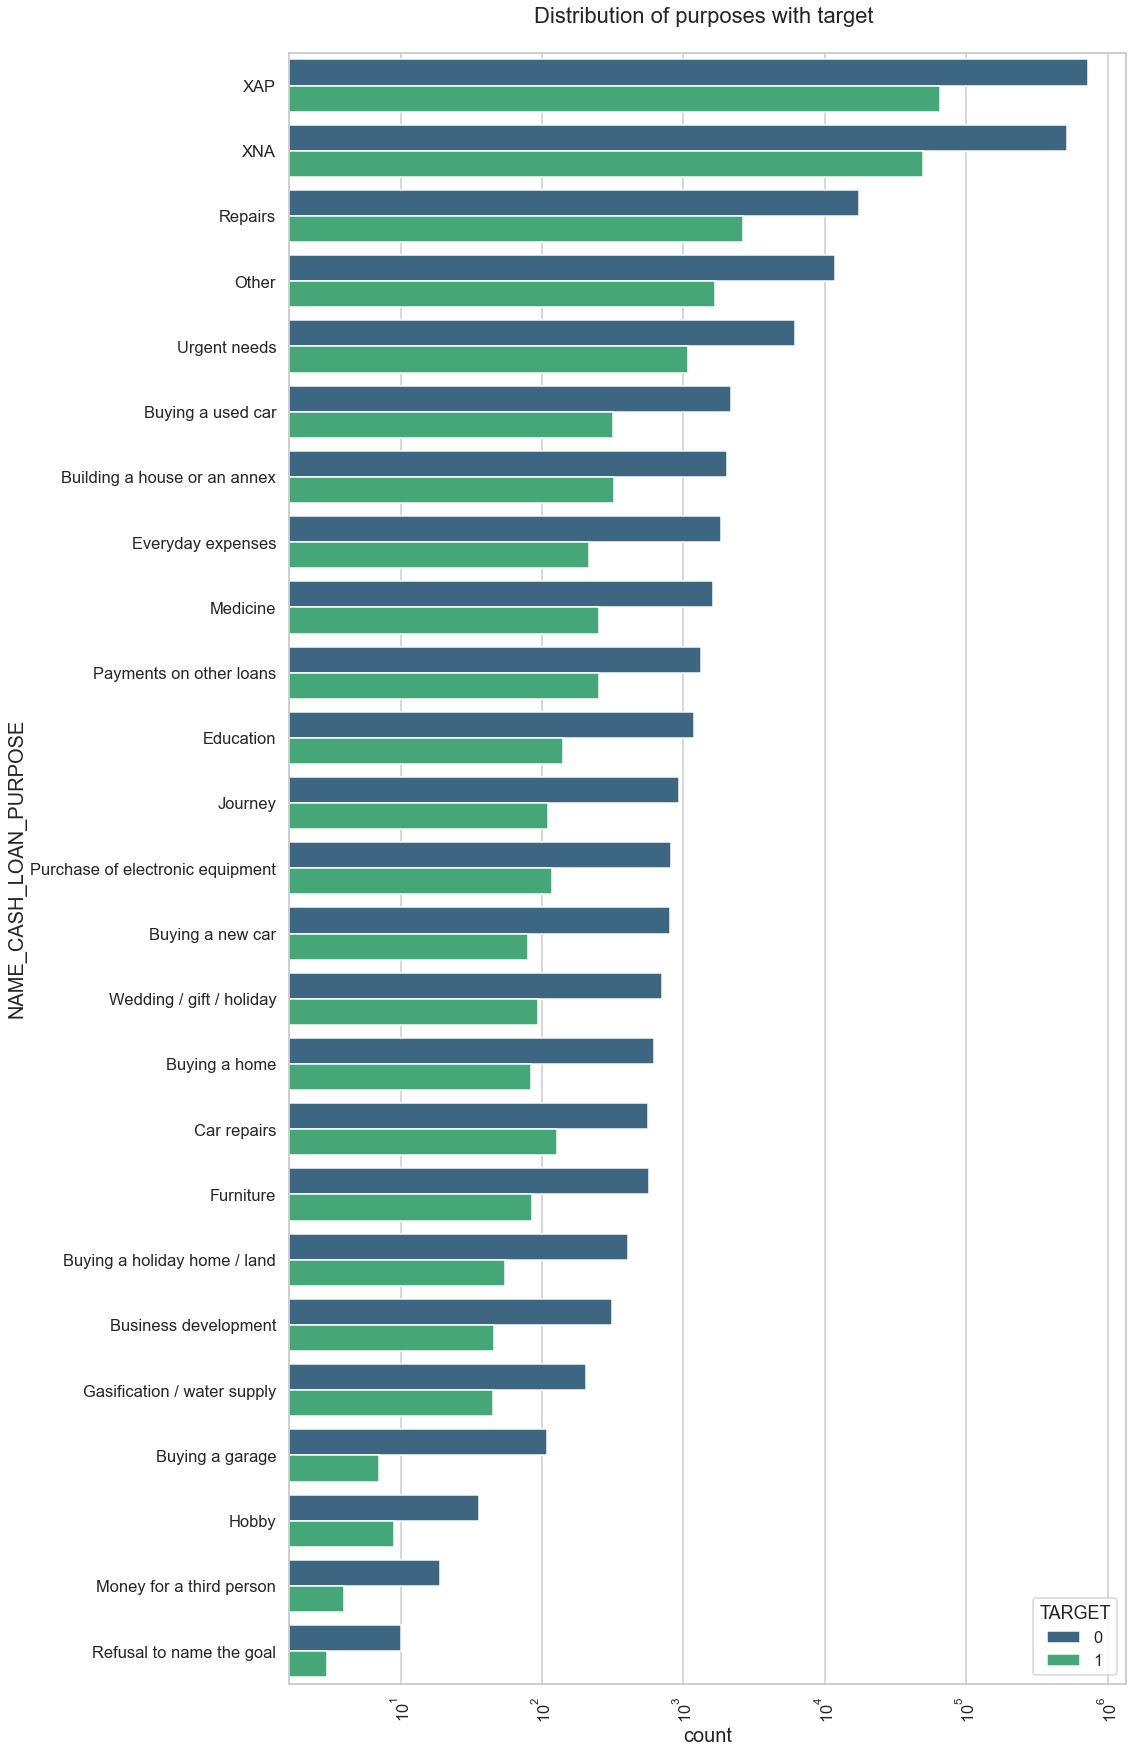

In [151]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = final, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=final['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='viridis') 

#### Points can be concluded from above-

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

#### Bivariate Analysis

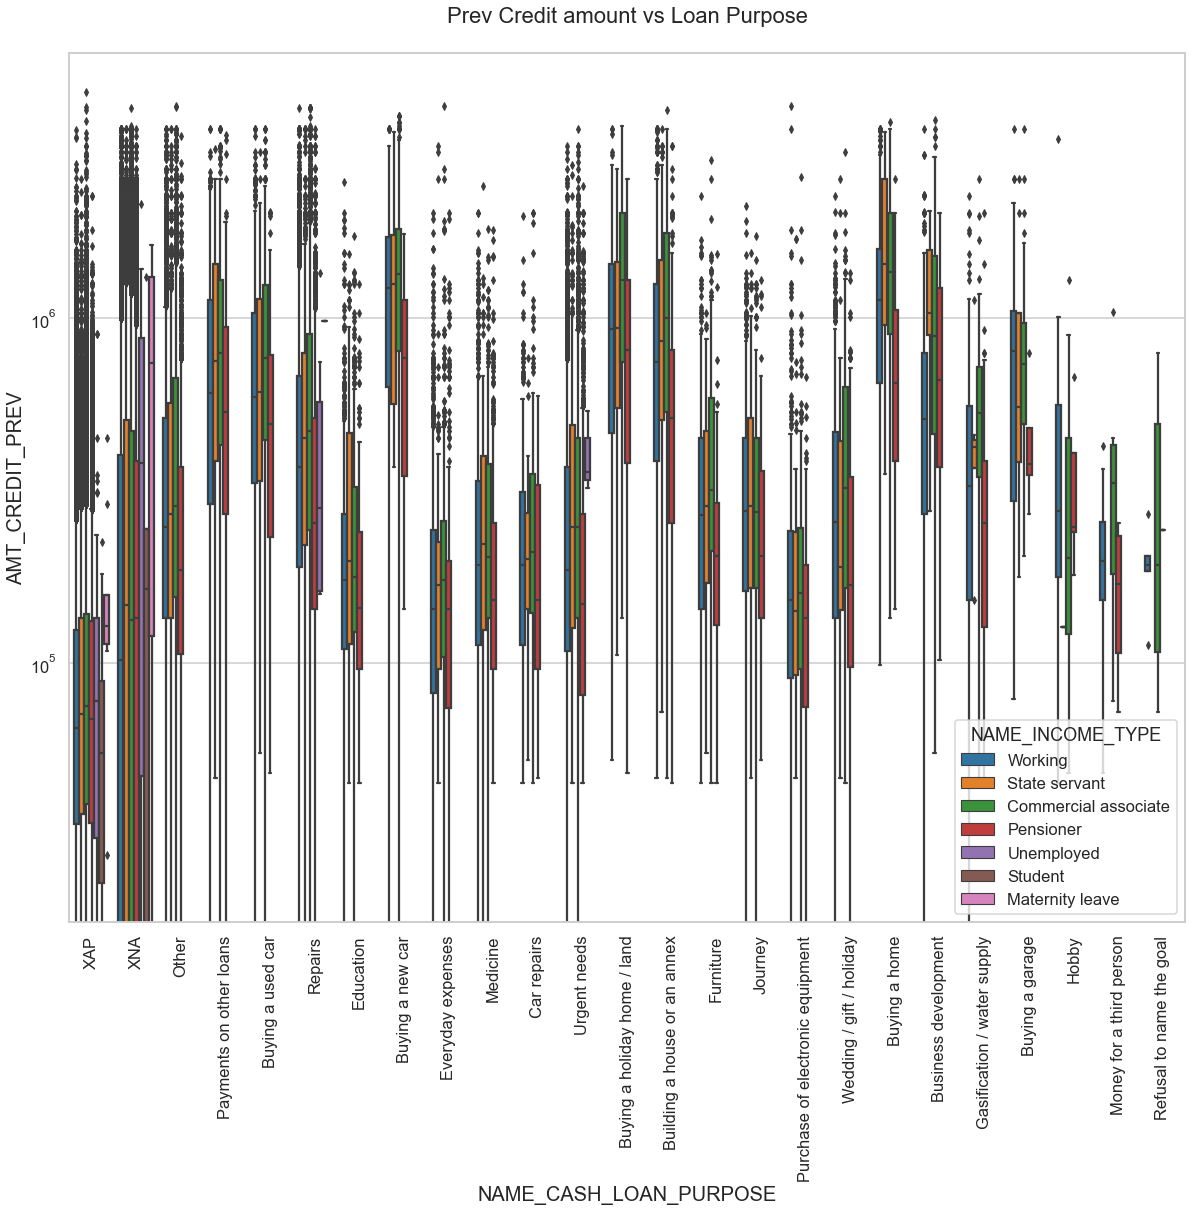

In [154]:
# Box plotting for Credit amount vs Loan Purpose

plt.figure(figsize=(20,16))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =final, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

#### Points can be concluded from above-

1. Income type of state servants have a significant amount of credit applied
2. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.

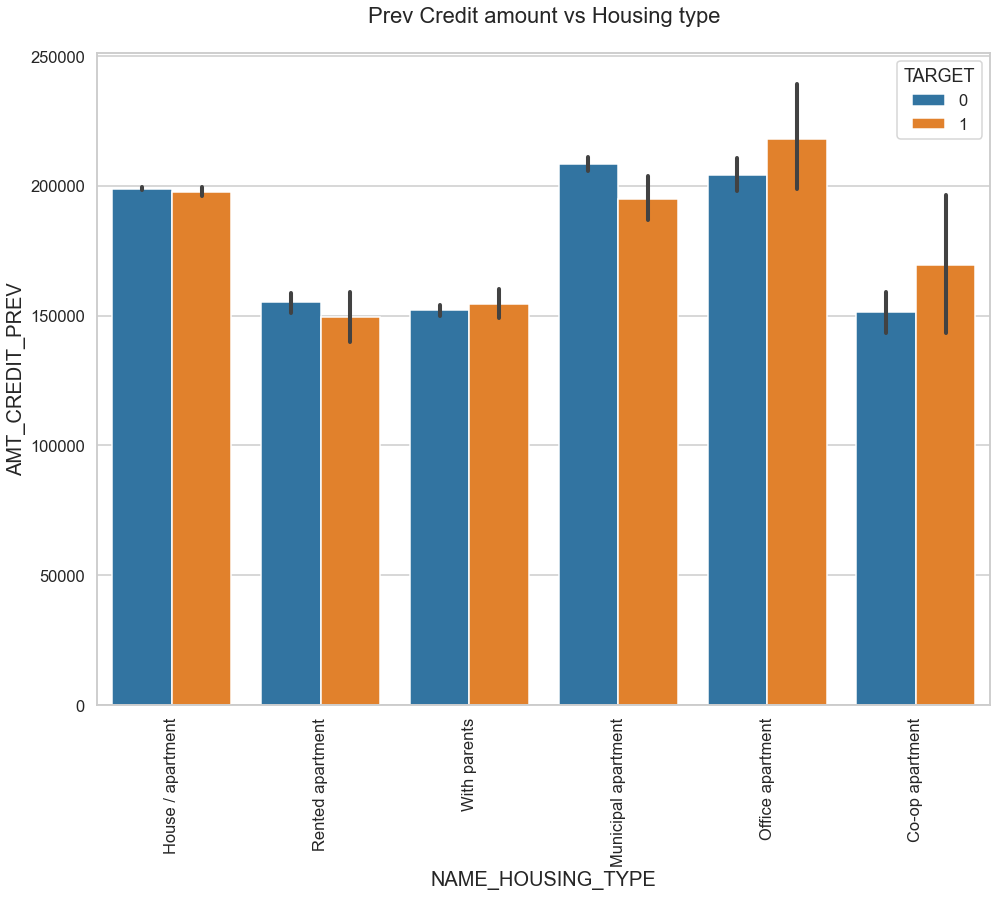

In [153]:
# Box plotting for Credit amount prev vs Housing type 

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =final, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

#### Points can be concluded from above-

1. For housing type House\appartment and Muncipal apartment have higher credit of target 0. It means less number of defaulters.
2. For housing type Office apartment and co-op apartment have more credits in target 1. It means more number of defaulters.

## CONCLUSION

1. More focus should be on clients from housing type ‘Rented apartment’, 'Muncipal apartment' as they are having least number of unsuccessful payments.
2. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ and 'Office apartment' for successful payments.
3. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
4. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.